In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv('airbnb/reviews_detail.csv')

In [3]:
dataset.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,9452127,58944174,2016-01-05,6279455,Ravi,Great place. Helena was prompt to reply and ve...
1,9452127,59446510,2016-01-10,23770684,Shiv,We had previously stayed at the apartment over...
2,9452127,59557387,2016-01-11,29070567,Jandall,Helena was a great host and extremely accommod...
3,9452127,62664325,2016-02-15,58381183,Cody,Helena was extremely accessible throughout the...
4,9452127,63410004,2016-02-22,29014080,Magnus,Awesome place! Looks just as in photos. Plenty...


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801784 entries, 0 to 801783
Data columns (total 6 columns):
listing_id       801784 non-null int64
id               801784 non-null int64
date             801784 non-null object
reviewer_id      801784 non-null int64
reviewer_name    801784 non-null object
comments         800995 non-null object
dtypes: int64(3), object(3)
memory usage: 36.7+ MB


In [40]:
sampleData=dataset.sample(n=10000)
sampleData=sampleData.dropna()

In [41]:
sampleData.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
510096,2141667,181903129,2017-08-13,129987392,Antonio,"Padrisimo lugar, gran experiencia"
210478,10084168,90847083,2016-08-02,28418668,Rahul,The host canceled this reservation 5 days befo...
363213,16382866,163390766,2017-06-24,82713957,Anne,Logement propre et calme mais chambre au sous ...
687368,8239352,67092729,2016-03-26,49144687,Sara,Ashley was great and welcoming. The space was ...
346241,2268950,41230620,2015-08-05,9603753,Angel,"If you love coffee like I do, you have to appr..."


In [42]:
inputData = sampleData.iloc[:,-1].values
inputData.item(0)

'Padrisimo lugar, gran experiencia'

In [43]:
def clean_data(textData):
    textData = re.sub(r'[?|$|.|!|\n|;|-|,|:|\d+]',r'',textData)
    textData = html.parser.unescape(textData)
    return textData

In [47]:
length = inputData.size
print("Review count",length)
for i in range(0,length):
    inputData[i] = clean_data(inputData.item(i))

Review count 9982


In [205]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=53,max_features=50,stop_words='english',ngram_range=(1,1))
feature_matrix = vectorizer.fit_transform(inputData.flatten())
print(feature_matrix.shape)

(9982, 50)


In [206]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters= 5, init='k-means++', random_state=0)
Y_out=model.fit_predict(feature_matrix)


In [207]:

import pandas as pd

X = pd.DataFrame(feature_matrix.toarray(), columns=vectorizer.get_feature_names())
print(X.head())

   amazing  apartment      area      away  bed  brooklyn  check  city  \
0      0.0        0.0  0.000000  0.000000  0.0       0.0    0.0   0.0   
1      0.0        0.0  0.000000  0.000000  0.0       0.0    0.0   0.0   
2      0.0        0.0  0.000000  0.000000  0.0       0.0    0.0   0.0   
3      0.0        0.0  0.000000  0.680995  0.0       0.0    0.0   0.0   
4      0.0        0.0  0.250203  0.000000  0.0       0.0    0.0   0.0   

      clean  close  ...   restaurants  room      stay  staying    subway  \
0  0.000000    0.0  ...           0.0   0.0  0.000000      0.0  0.000000   
1  0.000000    0.0  ...           0.0   0.0  0.000000      0.0  0.000000   
2  0.000000    0.0  ...           0.0   0.0  0.000000      0.0  0.000000   
3  0.416127    0.0  ...           0.0   0.0  0.000000      0.0  0.493615   
4  0.000000    0.0  ...           0.0   0.0  0.293695      0.0  0.000000   

     super      time  walk  wonderful  york  
0  0.00000  0.000000   0.0        0.0   0.0  
1  0.00000  

In [209]:
X['Cluster'] = Y_out  # Add column corresponding to cluster number
word_frequencies_by_cluster = X.groupby('Cluster').sum()

# To get sorted list for a numbered cluster, in this case 1
#print(word_frequencies_by_cluster.sort_values(by=['amazing']))
#df = word_frequencies_by_cluster.unstack(level=-1)
print(X.head())
word_frequencies_by_cluster=word_frequencies_by_cluster.sort_values(by=['amazing'],ascending=False)
print(word_frequencies_by_cluster)
X['Cluster'] = X['Cluster'].map({0: 1, 2: 2, 1: 3,4:4,3:5})
print(X.head())

   amazing  apartment      area      away  bed  brooklyn  check  city  \
0      0.0        0.0  0.000000  0.000000  0.0       0.0    0.0   0.0   
1      0.0        0.0  0.000000  0.000000  0.0       0.0    0.0   0.0   
2      0.0        0.0  0.000000  0.000000  0.0       0.0    0.0   0.0   
3      0.0        0.0  0.000000  0.680995  0.0       0.0    0.0   0.0   
4      0.0        0.0  0.250203  0.000000  0.0       0.0    0.0   0.0   

      clean  close   ...     room      stay  staying    subway    super  \
0  0.000000    0.0   ...      0.0  0.000000      0.0  0.000000  0.00000   
1  0.000000    0.0   ...      0.0  0.000000      0.0  0.000000  0.00000   
2  0.000000    0.0   ...      0.0  0.000000      0.0  0.000000  0.00000   
3  0.416127    0.0   ...      0.0  0.000000      0.0  0.493615  0.00000   
4  0.000000    0.0   ...      0.0  0.293695      0.0  0.000000  0.25334   

       time  walk  wonderful  york  Cluster  
0  0.000000   0.0        0.0   0.0        3  
1  0.000000   0.0 

In [216]:
sampleData['Rating']=X.iloc[:,-1:].values
sampleData.head(20)
sampleData.to_csv('generated_rating.csv')
sampleData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9982 entries, 510096 to 17663
Data columns (total 7 columns):
listing_id       9982 non-null int64
id               9982 non-null int64
date             9982 non-null object
reviewer_id      9982 non-null int64
reviewer_name    9982 non-null object
comments         9982 non-null object
Rating           9982 non-null int64
dtypes: int64(4), object(3)
memory usage: 623.9+ KB


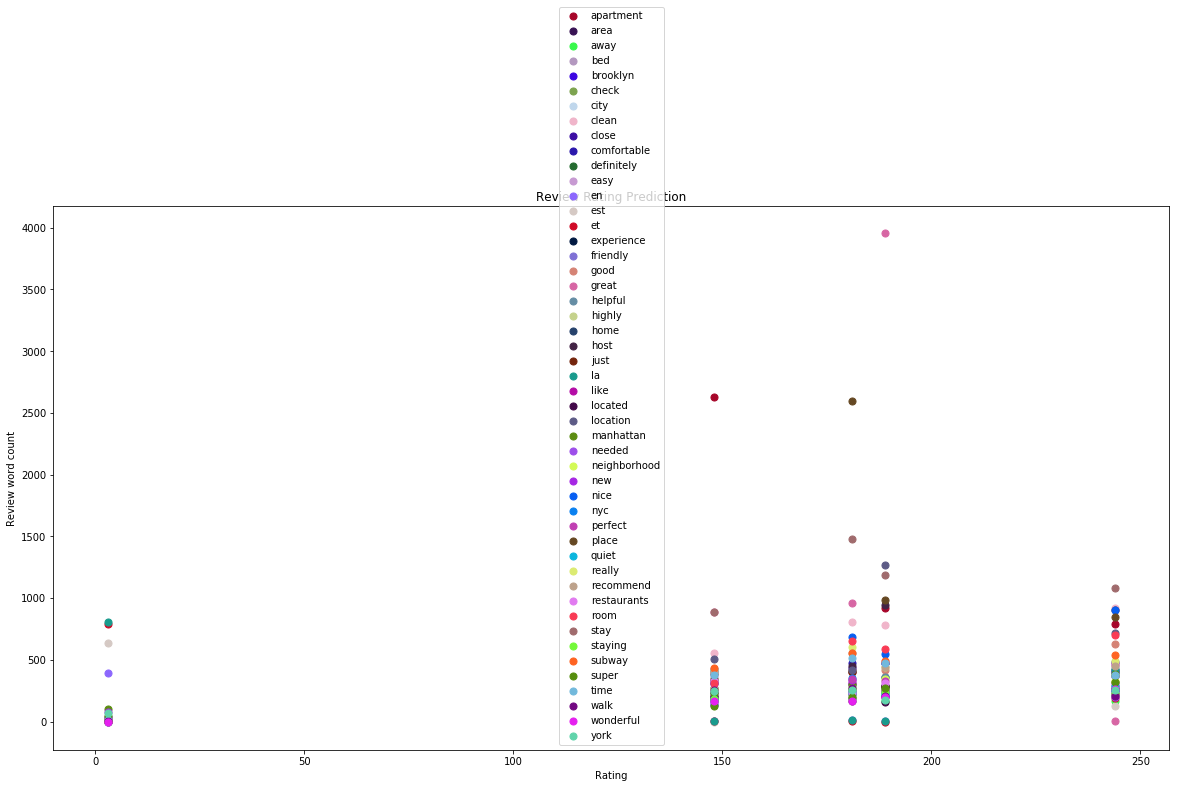

In [184]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
for j in range(2,51):
    plt.scatter(word_frequencies_by_cluster.iloc[:,0:1].values,word_frequencies_by_cluster.iloc[:,j-1:j].values, s = 50, c = np.random.rand(3,), label =X.columns[j-1])

#plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Review Rating Prediction')
plt.xlabel('Rating')
plt.ylabel('Review word count')
plt.legend()
plt.show()

<Figure size 576x432 with 0 Axes>

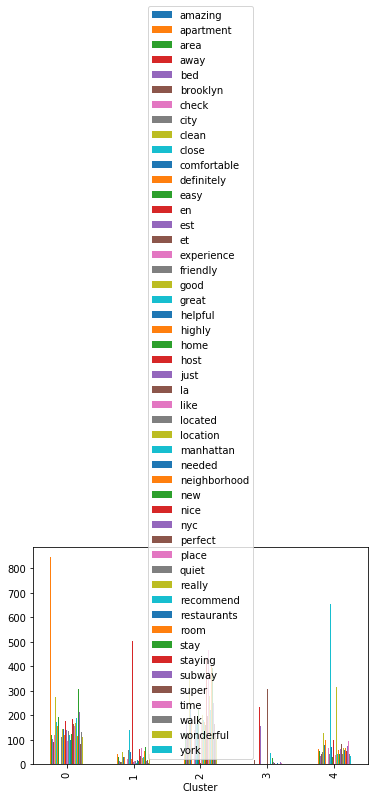

In [159]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
word_frequencies_by_cluster.plot.bar(ylim=0)
plt.show()

<class 'pandas.core.frame.DataFrame'>


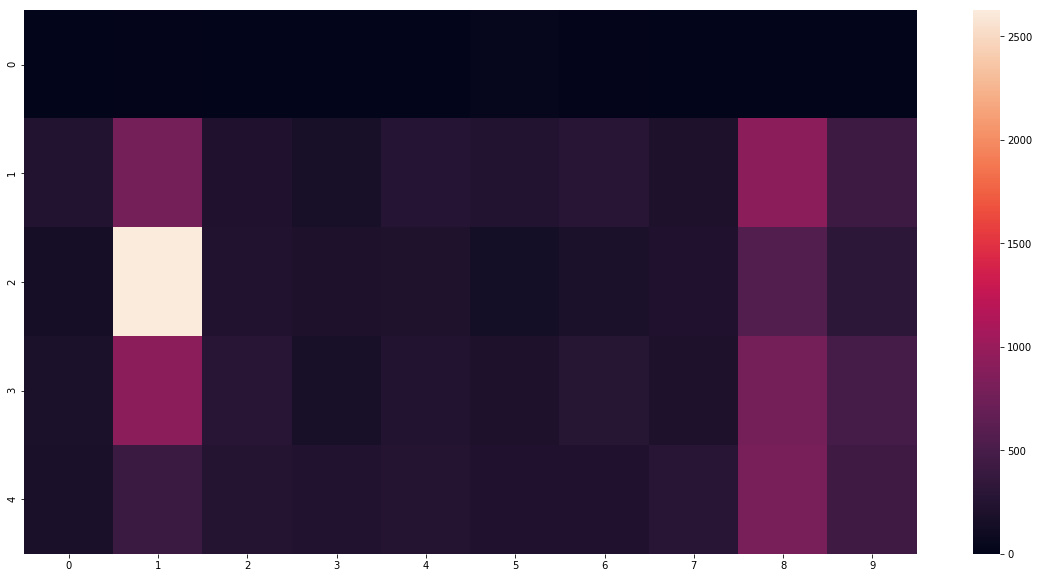

In [174]:
import seaborn as sns
fig = plt.figure(figsize=(20,10))
print(type(word_frequencies_by_cluster))
df = word_frequencies_by_cluster.iloc[:,0:10].values
sns.heatmap(df)
plt.show()

In [ ]:
length = feature_matrix.shape[0]
x_feature=[]
for i in range(0,length):
    x_feature.append(i)
   
print(vectorizer.get_feature_names())
X= np.array(x_feature)
print(x_feature[0:5])
print(Y_out[0:5])
